# Pandas

**Pandas** это высокоуровневая Python библиотека для анализа данных.

В экосистеме Python, pandas является наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных.

Pandas добавляет в Python новые структуры данных — **Series** и **DataFrame**.

Для подключения и использования библиотеки, её необходимо подключить следующей командой:


```
import pandas as pd
```

Конструкция `as`  позволяет переименовать библиотеку в более короткое название для удобства в дальнейшем при обращении к этой библиотеке и ее методам.



In [ ]:
import pandas as pd

##Структура данных Series

**Series** - одномерные массивы данных. Они очень похожи на списки, но отличаются по поведению — например, операции применяются к списку целиком, а в **Series** — поэлементно.

Конструктор класса Series выглядит следующим образом:



```
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- **data** – массив, словарь или скалярное значение, на базе которого будет построен Series;

- **index** – список меток, который будет использоваться для доступа к элементам Series. Длина списка должна быть равна длине data;

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Создать структуру Series можно на базе различных типов данных:

- словари Python;
- списки Python;
- массивы из numpy: ndarray;
- скалярные величины.

###Создание Series из списка Python

In [ ]:
lst = [1, 2, 3, 4, 5] # создание списка Python

s = pd.Series(lst) # создание Series
# Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов.

s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
lst = ['Мария', 'Петр', 'Иван'] # создание списка Python

s = pd.Series(lst, ['a', 'b', 'c']) # создание Series с заданием меток (именованые метки - a, b, c)

s

a    Мария
b     Петр
c     Иван
dtype: object

###Создание Series из ndarray массива из numpy

In [ ]:
import numpy as np

ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)

numpy.ndarray

In [ ]:
s2 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
s2

a    1
b    2
c    3
d    4
e    5
dtype: int64

###Создание Series из словаря (dict)

In [ ]:
d = {'a':1, 'b':2, 'c':3}
s3 = pd.Series(d)
s3

a    1
b    2
c    3
dtype: int64

###Создание Series с использованием константы

In [ ]:
a = 7

s4 = pd.Series(a, ['a', 'b', 'c'])

s4

a    7
b    7
c    7
dtype: int64

У объекта **Series** есть атрибуты через которые можно получить список элементов и индексы, это **values** и **index** соответственно.

In [ ]:
print(s4.index)
print('_'*10)
print(s4.values)

Index(['a', 'b', 'c'], dtype='object')
__________
[7 7 7]


###Работа с элементами Series

К элементам Series можно обращаться по численному индексу, при таком подходе работа со структурой не отличается от работы со списками в Python.

In [ ]:
# Создание Series из списка Python
s5 = pd.Series(['Иван', 'Петр', 'Мария', 'Анастасия', 'Федор'], ['a', 'b', 'c', 'd', 'e'])

# Обращание ко третьему элементу Series (нумерация начинается с 0)
print(s5[2])

Мария


Можно использовать метку, тогда работа с **Series** будет похожа на работу со словарем (dict) в Python.

In [ ]:
# Обращание ко третьему элементу Series по заданному индексу (нумерация начинается с 0)
print(s5['c'])

Мария


В поле для индекса можно поместить условное выражение.

In [ ]:
s6 = pd.Series([10, 13, 1, 5, 0], ['a', 'b', 'c', 'd', 'e'])

# Выведет все значения в Series меньше трех
s6[s6 <= 3]

c    1
e    0
dtype: int64

In [ ]:
# Получение элементов с метками 'a', 'c' и 'e':
s6[['a', 'c', 'e']]

a    10
c     1
e     0
dtype: int64

Обращение по слайсу (срезу) меток.

Получение элементов структуры с метками от 'a' до 'd':

In [ ]:
s6['a':'d']

a    10
b    13
c     1
d     5
dtype: int64

Получение элементов стурктуры с индексами от 0 до 4:

In [ ]:
s6[0:4]

a    10
b    13
c     1
d     5
dtype: int64

###Работа с Series

Со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.

In [ ]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
s8 = pd.Series([1, 1, 1, 1, 0], ['a', 'b', 'c', 'd', 'e'])

# сложение
# к каждому элементу s7 прибавляется каждый элемент s8
# для корректного сложения необходимо, чтобы длинна Series совпадла
s9 = s7 + s8
s9

a    11
b    21
c    31
d    41
e    50
dtype: int64

In [ ]:
# Каждый элемент s7 увеличится в 3 раза
s9 = s7 * 3

s9

a     30
b     60
c     90
d    120
e    150
dtype: int64

##Структура данных DataFrame

Если **Series** представляет собой одномерную структуру, которую для себя можно представить как таблицу с одной строкой, то **DataFrame** – это уже двумерная структура – полноценная таблица с множеством строк и столбцов.

Конструктор класса DataFrame выглядит так:



```
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

- **data** – массив ndarray, словарь (dict) или другой DataFrame;

- **index** – список меток для записей (имена строк таблицы);

- **columns** – список меток для полей (имена столбцов таблицы);

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Cтруктуру **DataFrame** можно создать на базе:

- словаря (dict) в качестве элементов которого должны выступать: одномерные - ndarray, списки, другие словари, структуры Series;
- двумерные ndarray;
 структуры Series;
- структурированные ndarray;
- другие DataFrame.



###Создание DataFrame из словаря

In [ ]:
import pandas as pd

d = {"Name":pd.Series(['Виктор', 'Мария', 'Иван']),
     "Age": pd.Series([18, 21, 19])}

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19


###Создание DataFrame из списка словарей

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19


###Создание DataFrame из двумерного массива

In [ ]:
import numpy as np

nda = np.array([[1, 2, 3], [10, 20, 30]])

df = pd.DataFrame(nda)
df

,0,1,2
0,1,2,3
1,10,20,30


###Работа с элементами DataFrame

Обращение к столбцу DataFrame:

- df['Название столбца']
- df.название_столбца

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df['Name']

0    Виктор
1     Мария
2      Иван
Name: Name, dtype: object

In [ ]:
df.Age

0    18
1    21
2    19
Name: Age, dtype: int64

In [ ]:
df.Name

0    Виктор
1     Мария
2      Иван
Name: Name, dtype: object

Также для работы со строками и столбцами существуют методы:

**DataFrame.loc[]**- Доступ к группе строк и столбцов (или только к столбцам, или только к строкам) по меткам или логическому массиву.

Допустимые входы:
- Одиночная метка, например 5 или 'a', (обратите внимание, что 5 - интерпретируется как метка индекса, а не как целочисленная позиция по индексу).
- Список или массив меток, например ['a', 'b', 'c']
- Объект среза с метками, например 'a':'f'.

**DataFrame.iloc[]** - позволяет получить доступ к элементам DataFrame по целочисленном индексам.

Допустимые входы:
- Целое число, например 5.
- Список или массив целых чисел, например .[4, 3, 0]
- Объект среза с целыми числами, например 1:7.

In [ ]:
df.iloc[0] # по индексу вернет 0 строку DataFrame

Name    Виктор
Age         18
Name: 0, dtype: object

Для доступа к элементам и по строке и по столбцу используется следующая конструкция:

- DataFrame.iloc[строка, столбце]
- DataFrame.iloc[диапазон:строк, диапазон:столбцов]

In [ ]:
df.iloc[0,1] # по индексу вернет элемент DataFrame на пересечении 0 строки и 1 столбца [строка, столбца]

df.iloc[:, 1] # вернет все элементы 1 столбца для всех строк

df.iloc[0:2,:] # вернет значения всех стобцов для 0 и 1 строк

,Name,Age
0,Виктор,18
1,Мария,21


In [ ]:
df.loc[:, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для всех строк

df.loc[:1, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для 0 и 1 строк

0    Виктор
1     Мария
Name: Name, dtype: object

Методы .loc[], .iloc[] также применимы к структуре Series.

Также в поле для индекса можно писать логические условия для фильтрации значений.

In [ ]:
#  Вывести все строки, в которых значение в столбце Age больше и равно 20
df[df['Age'] >= 20]

,Name,Age
1,Мария,21


###Методы и атрибуты DataFrame

У объекта DataFrame (также как и у Series) есть атрибуты через которые можно получить индексы, а также метод позволяющий получить названия колонок.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

print(df.index) # возвращает индексы DataFrame
print(df.columns) # возвращает названия колонок
print(df.head(2)) # вывод первых двух строчек DataFrame
print(df.tail(2)) # вывод последних двух строчек DataFrame

RangeIndex(start=0, stop=3, step=1)
Index(['Name', 'Age'], dtype='object')
     Name  Age
0  Виктор   18
1   Мария   21
    Name  Age
1  Мария   21
2   Иван   19


DataFrame - это двумерная структура, напоминающая таблицу размерностью NxM, где N - это количество строк, M - количество стобцов.

**shape** - атрибут DataFrame, который возвращает его размерность.
1 число строки 2 число столбцы

In [ ]:
df.shape

(3, 2)

In [ ]:
df.info() # метод возвращает полную информацию о данном DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


Часто при работе с данными, их необходимо проверять на пропуски (NaN).

Для этого существуют методы - **isna()**, **isnull()**.

Они возвращают два объекта DataFrame с булевыми значениями, где True для значений NaN в DataFrame, а False — на его отсутствие. Эти функции часто используются в фильтрах для создания условий.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df.isna()

,Name,Age
0,False,False
1,False,True
2,False,False


In [ ]:
df.isnull()

,Name,Age
0,False,False
1,False,True
2,False,False


In [ ]:
# Фильтр, который вернет все строки, в которых отсутсвуют пустые значения в колонке Age

df[df['Age'].isnull()==False]

,Name,Age
0,Виктор,18.0
2,Иван,19.0


In [ ]:
# подсчет пустых значений в каждой колонке DataFrame
df.isna().sum()

Name    0
Age     1
dtype: int64

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Подсчет уникальных значений в стобце
df['Name'].unique()

# Подсчет количества для каждого значения в столбце
df['Name'].value_counts()

Иван      2
Виктор    1
Мария     1
Name: Name, dtype: int64

Удаление значений из DataFrame.

Существуют различные методы, позволяющие удалять сроки или столбцы из DataFrame.

`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

- labels - Метки индекса или столбца, которые нужно удалить
- axis - {0 или 'index', 1 или 'columns'}
- index - Альтернатива указанию оси (эквивалент axis=0)
- columns - Альтернатива указанию оси (эквивалент axis=1)
- level - Для MultiIndex - уровень, с которого будут удалены метки
- inplace - Если False, вернет копию DataFrame. В противном случае перезапишет изменения в этот же DataFrame.


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Удалить столбцы
df.drop(['Age'], axis=1)

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
# по умолчанию inplace = False, поэтому в предыдущей ячейке
# операция drop() вернула копию измененного DataFrame
# исходный DataFrame остался без изменений
df

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0


In [ ]:
df.drop(['Age'], axis=1, inplace=True)
df

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

df.drop(columns=['Age'])

,Name
0,Виктор
1,Мария
2,Иван
3,Иван


In [ ]:
df.drop([0, 1])

,Name,Age
2,Иван,19.0
3,Иван,25.0


Также существует метод dropna(), который позволяет удалять строки или столбцы, содержащие пустые значения.

`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

- axis - {0 или 'index', 1 или 'columns'}, по умолчанию 0. Определяет, удаляются строки или столбцы, содержащие отсутствующие значения. 0 или «index»: удалить строки, содержащие пропущенные значения. 1 или «columns»: удалить столбцы, содержащие отсутствующее значение.
- how - Определяет, удаляется ли строка или столбец из DataFrame, когда у нас есть хотя бы одно NA или все NA. 'any': если присутствуют какие-либо значения NA, отбросьте эту строку или столбец. 'all': если все значения - NA, отбросьте эту строку или столбец.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": np.NaN, "Age": np.NaN}]

df = pd.DataFrame(d)
df

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0
4,NaN,NaN


In [ ]:
# удалить строки (axis=0), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=0, how='any')

,Name,Age
0,Виктор,18.0
2,Иван,19.0
3,Иван,25.0


In [ ]:
# удалить столбцы (axis=1), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=1, how='any')

""
0
1
2
3
4


In [ ]:
# удалить строки (axis=0), которые содержат все одно пропущенные значения
df.dropna(axis=0, how='all')

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0


In [ ]:
# удалить столбцы (axis=1), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=1, how='all')

,Name,Age
0,Виктор,18.0
1,Мария,NaN
2,Иван,19.0
3,Иван,25.0
4,NaN,NaN


Добавление строк или столбцов в существующий DataFrame.

Добавить новый столбец в существующий DataFrame можно воспользовавшись следующей конструкцией:

`df['new_column'] = values`

- values - значения в новом столбце (числов, список, Series)


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df

,Name,Age
0,Виктор,18
1,Мария,21
2,Иван,19
3,Иван,25
4,Алексей,20


In [ ]:
# Добавление нового столбца - значения которого переданы в виде списка
df['University'] = ['NRNU MEPhI', 'MIPT', 'MITP', 'NRNU MEPhI', 'BMSTU']

df

,Name,Age,University
0,Виктор,18,NRNU MEPhI
1,Мария,21,MIPT
2,Иван,19,MITP
3,Иван,25,NRNU MEPhI
4,Алексей,20,BMSTU


In [ ]:
# Добавление нового столбца - все значения будут одинаковы и равны 'bachelor'
df['level'] = 'bachelor'
df

,Name,Age,University,level
0,Виктор,18,NRNU MEPhI,bachelor
1,Мария,21,MIPT,bachelor
2,Иван,19,MITP,bachelor
3,Иван,25,NRNU MEPhI,bachelor
4,Алексей,20,BMSTU,bachelor


Также существует метод позволяющий объединять объекты Series и DataFrame.

`pandas.concat( objs , axis = 0 , join = 'outer' , ignore_index = False , keys = None , levels = None , names = None , verify_integrity = False , sort = False , copy = True )`

- objs последовательность или сопоставление объектов Series или DataFrame
- ось {0 / 'index', 1 / 'columns'}, по умолчанию 0. Ось для объединения (объединение по столбцам или по строкам).


In [ ]:
# Объединение двух Series
# так как параметр ignore_index по умолчанию False
# то сохраняется старая нумерация в Series
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [ ]:
# Объединение двух Series
# очистить существующий индекс и сбросить его в результате
# можно задав ignore_index=True
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
# Объединений двух DataFrame
df1 = pd.DataFrame([['Петр', 19], ['Иван', 22]], columns=['Name', 'Age'])
df1

,Name,Age
0,Петр,19
1,Иван,22


In [ ]:
df2 = pd.DataFrame([['Мария', 20], ['Анастасия', 18]], columns=['Name', 'Age'])
df2

,Name,Age
0,Мария,20
1,Анастасия,18


In [ ]:
#  объединение по строкам
pd.concat([df1, df2])

,Name,Age
0,Петр,19
1,Иван,22
0,Мария,20
1,Анастасия,18


In [ ]:
# объединение по столбцам
pd.concat([df1, df2], axis=1)

,Name,Age,Name,Age
0,Петр,19,Мария,20
1,Иван,22,Анастасия,18


In [ ]:
pd.concat([df1, df2], ignore_index=True)

,Name,Age
0,Петр,19
1,Иван,22
2,Мария,20
3,Анастасия,18


## Импорт данных

Для создания DataFrame можно использовать внешние данные, например из файлов .csv или  .xlsx.

**CSV** (Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных.

Каждая строка - это отдельная строка таблицы, а столбцы отделены один от другого специальными символами - разделителями (например, запятой).

Для загрузки .csv файла с данными в pandas используется функция **read_csv()**.

У функции есть ряд ключевых параметров:
- filepath_or_buffer - путь к файлу, который необходимо считать
- sep - Используемый разделитель

По умолчанию предполагается, что поля разделены запятыми.

In [ ]:
import pandas as pd

df = pd.read_csv("my.csv", sep=',')

Существует анологичная функция для чтения данных с Excel.

In [ ]:
import pandas as pd

df = pd.read_excel("my_fires_dataframe.xlsx")

## Экспорт данных

DataFrame и Series можно сохранять в виде файлов .csv и .xlsx

`DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)`

- path_or_buf - пусть к файлу
- sep - Строка длиной 1. Разделитель полей для выходного файла.

Чтобы записать отдельный объект в файл Excel .xlsx, необходимо только указать имя целевого файла. Для записи на несколько листов необходимо создать объект ExcelWriter с именем целевого файла и указать лист в файле для записи.

`DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None)`

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

# df.to ("путь/название файла.расширение")
df.to_csv("my.csv")
df.to_excel("test.xlsx")

##Задания



**Задание 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

### *

In [ ]:
1,3,4,5,6,7,8

In [ ]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

In [ ]:
s

0     4.170220
1     7.203245
2     0.001144
3     3.023326
4     1.467559
        ...   
95    2.370270
96    9.033795
97    5.736795
98    0.028703
99    6.171449
Length: 100, dtype: float64

In [ ]:
sor_s = s.sort_values().reset_index(drop=True)
print(sor_s[sor_s>5][:1])

51    5.148891
dtype: float64


In [ ]:
s[51]

6.788355329398909

In [ ]:
sor_s[51]

5.148891120583086

### **Задание 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

### /

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

# ваш код тут

,имя,возраст,доход,надежность клиента (0..1),пол
0,Петя,45,100000,0.65,муж
1,Вася,26,80000,0.74,муж
2,Аня,41,150000,0.87,жен
3,Света,21,60000,0.68,жен


In [ ]:
df['возраст'].mean()

33.25

In [ ]:
df['возраст'].mean()-df['возраст']

0   -11.75
1     7.25
2    -7.75
3    12.25
Name: возраст, dtype: float64

In [ ]:
df[(df['возраст'] >= 40) & (df['доход'] > df['доход'].mean()) & (df['надежность клиента (0..1)'] < df['надежность клиента (0..1)'].mean())]
df['важность клиента'] = df['доход'] * df['надежность клиента (0..1)']
df['возможная долгосрочность клиента'] = df['важность клиента'] *(df['возраст'].mean()-df['возраст'])
df

,имя,возраст,доход,надежность клиента (0..1),пол,важность клиента,возможная долгосрочность клиента
0,Петя,45,100000,0.65,муж,65000.0,-763750.0
1,Вася,26,80000,0.74,муж,59200.0,429200.0
2,Аня,41,150000,0.87,жен,130500.0,-1011375.0
3,Света,21,60000,0.68,жен,40800.0,499800.0


## **Задание 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.
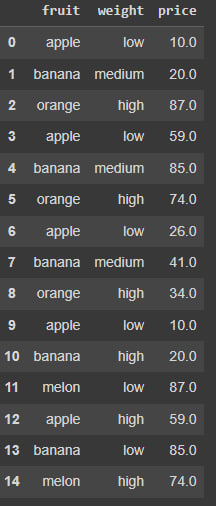

### /

In [ ]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

In [ ]:
df1

,fruit,weight,price
0,apple,low,93
1,banana,medium,46
2,orange,high,36
3,apple,low,60
4,banana,medium,74
5,orange,high,0
6,apple,low,26
7,banana,medium,41
8,orange,high,34


In [ ]:
df2

,frukt,ves,price
0,apple,low,10
1,banana,high,20
2,melon,low,87
3,apple,high,59
4,banana,low,85
5,melon,high,74


In [ ]:
df2 = df2.rename(columns={"frukt": "fruit", "ves": "weight"})

In [ ]:
pd.concat([df1, df2], ignore_index=True, join='outer')

,fruit,weight,price
0,apple,low,10.0
1,banana,medium,20.0
2,orange,high,87.0
3,apple,low,59.0
4,banana,medium,85.0
5,orange,high,74.0
6,apple,low,26.0
7,banana,medium,41.0
8,orange,high,34.0
9,apple,low,10.0


In [ ]:
df = pd.DataFrame(data=np.arange(start=1, stop=21), columns=['data'])
print(df)
print()
df = df[(df['data'] > 1) & (df['data'] < 20)]
df

    data
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20



,data
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10
10,11


In [ ]:
df = pd.DataFrame(data=np.arange(20).reshape(4, 5), columns=list('abcde'))

df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [ ]:
df['f'] = df['a']+ df['b']+ df['c']+ df['d']+ df['e']
df

,a,b,c,d,e,f
0,0,1,2,3,4,10
1,5,6,7,8,9,35
2,10,11,12,13,14,60
3,15,16,17,18,19,85


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('input.csv')
is_null = []
for index in list(df.index):
    is_null.append(any(pd.isnull(df.loc[index, :])))
if True in is_null:
  print(True)
else:
  print(False)

True


In [ ]:
df

,Unnamed: 0,0,1
0,0,NaN,6
1,1,1.0,2


In [ ]:
a

Unnamed: 0    0
0             1
1             0
dtype: int64

In [ ]:
Заполните пропуски так, чтобы после выполнения второй строки кода, количество элементов в матрице равнялось 90% от исходного.

df = pd.DataFrame(data=np.arange(start=1, stop=21), columns=['data'])

df = df[(df['data'] > ) & (df['data'] < )]

In [ ]:
Заполните пропуски так, чтобы после выполнения второй строки кода, количество элементов в матрице увеличилось на  4.

df = pd.DataFrame(data=np.arange().reshape(,), columns=list())

df['f'] = df['a']+ df['b']+ df['c']+ df['d']+ df['e']